<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Apellidos, Nombres** Thomas Garzon

**03-08-2022**

<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 


### <center><h2> INGENIERÍA EN BIOTECNOLOGÍA</h2></center>

<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=400 height=300 />

# <center><h1 style="color:orange">GBI6 - BIOINFORMÁTICA</h1></center>

# <center><h1 style="color:orange">BIOPYTHON</h1></center>

### Thomas Garzon

| Caracteristicas de mi computadora| 
| :---: |
| sistema Operativo  Windows 10 |
| Procesador Intel(R) Core(TM) i5-5300U CPU @ 2.30GHz   2.29 GHz | 
| RAM utilizable  7,88 GB |
| Identificador de dispositivo  A2FF5553-A8EB-4B01-BC8E-3444112381CE |

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```map_science```: para su data replique el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb), donde los puntos resaltados son al menos 5 países

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [ ]:
# Escriba aquí su código para el ejercicio 1


In [1]:
import miningscience

In [ ]:
?miningscience.download_pubmed

In [ ]:
?miningscience.map_science


## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [ ]:
# Escriba aquí su código para el ejercicio 2
import re


In [ ]:
miningscience.download_pubmed("Denge")

In [ ]:
# Contribución de los autores
with open("data/pubmed_results.txt") as datafile:
    author_dict = {}
    for line in datafile:
        if re.match("AD", line):
            author = line.split("-", 1)[-1]# capture author
            author = author.strip()# remove leading and trailing whitespace
            author_dict[author] = 1 + author_dict.get(author, 0)# if key is present, add 1, if it's not present, initialize at 1

In [ ]:
for author in sorted(author_dict, key = author_dict.get, reverse = True):
    print(author, ":", author_dict[author])

In [ ]:
print ("El numero de articulos es:", len("data/pubmed_results.txt"))

## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```map_science``` para: 

- Visualizar un mapa para cada data descargada en el ejercicio 2.
- Guardar los mapas en la carpeta ```img```

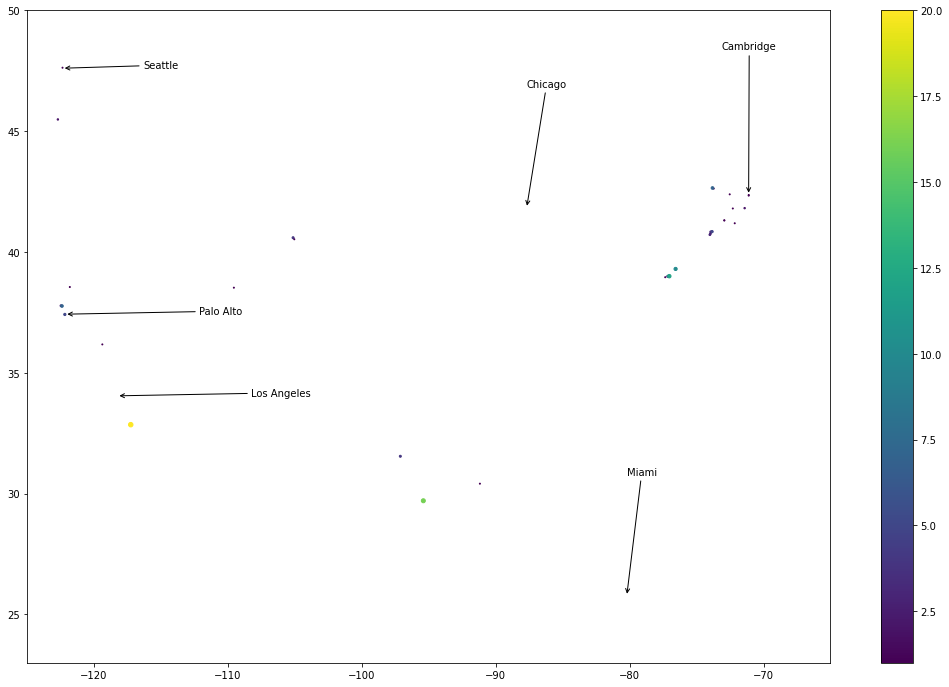

In [2]:
# Escriba aquí su código para el ejercicio 3
miningscience.map_science("data/pubmed_results.txt")

In [ ]:
fig.savefig('graficos.eps', dpi = 300)

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

#### En cambridge y en los angeles los casos de debgue hab sido elevados

*Escriba la respuesta del ejercicio 5*


## Ejercicio 5 [2 puntos]

Para algún **gen de interés** (podría usar [Lista de genes por tipología](https://www.genome.jp/kegg/pathway.html#metabolism)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [19]:
# Escriba aquí su código para el ejercicio 6
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [20]:
from Bio.Align.Applications import ClustalwCommandline
import os

In [22]:
# cargar data multiple y crear alineamientos
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/rag2s.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=data/rag2s.fasta


In [24]:
ClustalAlign = AlignIO.read("data/rag2s.aln", "clustal")
print(ClustalAlign)

Alignment with 133 rows and 2895 columns
--------------------------------------------...--- FJ230865.1
--------------------------------------------...--- FJ230858.1
--------------------------------------------...--- FJ039926.1
--------------------------------------------...--- FJ039990.1
--------------------------------------------...--- FJ039983.1
--------------------------------------------...--- FJ039976.1
--------------------------------------------...--- FJ039969.1
--------------------------------------------...--- FJ039962.1
--------------------------------------------...--- FJ039954.1
--------------------------------------------...--- FJ039947.1
--------------------------------------------...--- FJ039940.1
--------------------------------------------...--- FJ039933.1
--------------------------------------------...--- FJ009033.1
--------------------------------------------...--- FJ039997.1
--------------------------------------------...--- FJ009026.1
-----------------------------

In [26]:
# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("data/rag2s.dnd", "newick")
Phylo.draw_ascii(tree)

                                                           _ FJ230879.1
                                                          |
                                                          |_ FJ230872.1
                                                          |
                                                          |  , FJ230865.1
                                                          | ,|
                                                          | || FJ230858.1
                                __________________________| |
                               |                          | | FJ039926.1
                               |                          | |
                               |                          | , FJ039997.1
                               |                          | |
                               |                          | , FJ039990.1
                               |                          | |
                               |                          

**Escriba aquí la interpretación del árbol**

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
